# CMSC 828L  
## Problem Set 1

#### Problem 1: Single input Neuron - Single output

#### *Neural Network:*

**Summary of Implementation**

The Network consists of a single input layer and a single output layer. The Network is programmed in the following manner:
The Class "Neural Network" handles all the functionalitlies related to the network which includes feedforward, cost estimation, backprop etc.. 

**Training Data:** The function *GenerateTestData()* Generates the required training data: input x and output y. 
For this particular network, The Training data is modelled by the function

$$y= 2x + 6 + \xi $$

where $\xi$ is a Gaussian Noise added to the data. The noise is added using Numpy's built in *random* method.

The output of Input neuron is given by 
$$a^0_1 = x_1 * w_1 + b_1 $$
where $a^0_1$ is the output of the Neuron, $x_1$ is the input, $w_1$ and $w_2$ are weights and biases respectively. These weights and biases are randomly initialized using numpy's random function

The Output is given by:
$$a^1_1 = \sum_{k=1}^d w_{1k}^0 a_k^0 + b_1^1$$

**Cost** Once the parameters are fed forward, the Cost function is calculated using Mean square differences. 
$\sum_{i=1}^n \frac{1}{2} (y_i - a_1^1(x_i))^2$

**Back Propagation** Differentiating this Cost function with respect to weights and biases, we obtain the rate of change of Weights and Biases (Gradients) responsible for the Error. 

$$ \frac{dC}{dW} = \sum X_i * (y - a_1^1)$$


Delta values of these Weights and biases are calculated, which are further used to tweak the and the actual weights, biases by a factor of *alpha* called the "Learning rate"

$Updated\_weights = Old\_weights + alpha * Delta\_Weights$


### Code 

In [124]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\12403\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


**Hyper Parameters**

In [125]:
NumOfIterations = 600
alpha = 0.0001
InputSampleSize = 80
TrainingSize = 70
TestSize = 20

In [126]:
class NeuralNetwork_1D:
    def __init__(self, x, y):
        self.input = x
        self.weights_1 = np.random.rand(self.input.shape[1],1)
        self.bias_1 = np.random.rand(1)
        self.y = y
        self.a1_out = np.zeros([self.input.shape[1],1])
        self.m = len(x)
        
    def Feedforward(self, X):
        self.a1_out = np.dot(X, self.weights_1) + self.bias_1
        return self.a1_out 
    
    def cost(self): #self.a, self.y
        C = (0.5/self.m) *sum((self.y - self.a1_out)**2)
        return C
    
    def CalcParameters(self):
        delta = self.y - self.a1_out
        dCdW = (1/self.m)* np.dot(self.input.T, delta)
        dCdb = (1/self.m)* np.sum(delta)
        return dCdW, dCdb
    
    def UpdateParameters(self, dCdW, dCdb, alpha):
        self.weights_1 = self.weights_1 + (alpha*dCdW)
        self.bias_1 = self.bias_1 + (alpha*dCdb)

In [127]:
def GenerateTrainingData(Size):
    x = np.linspace(0, 10, Size).reshape(Size, 1)
    y = np.zeros(Size).reshape(Size,1)
    for n in range(Size):
        y[n] = (2 * x[n]) + 6 + (np.random.randn())
    
    return x,y

Text(0.5,1,'Training data')

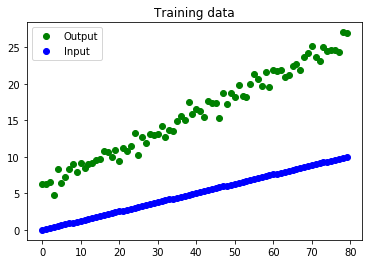

In [128]:
x, y = GenerateTrainingData(InputSampleSize)
plot(y, 'o', picker = 2, color = "green")
plot(x,'o', picker =2, color = "blue")
legend(['Output','Input'])
title("Training data")

**Initialization and Training**

In [129]:
NN_1D = NeuralNetwork_1D(x, y)

In [130]:
Output1 = NN_1D.Feedforward(x)

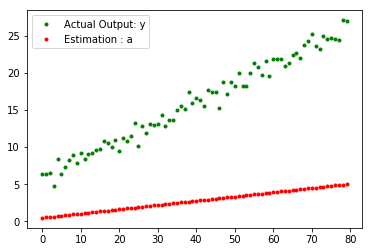

In [131]:
plot(y, '.', picker = 0.2, color = "green")
plot(Output1, '.', color = "red")
legend(['Actual Output: y', 'Estimation : a'])

In [132]:
cost = NN_1D.cost()
print("Initial cost = " + str(cost))

Initial cost = 97.50507834020539


**Back propogating the Error**

In [133]:
CostTracker = np.zeros(NumOfIterations)

for i in range(NumOfIterations):
    dW, dB = NN_1D.CalcParameters()
    NN_1D.UpdateParameters(dW, dB, alpha)
    Output_new = NN_1D.Feedforward(x)
    CostTracker[i] = NN_1D.cost()


In [134]:
NN_1D.weights_1.shape

(1, 1)

**Cost Curve**

Text(0.5,1,'Cost Vs Number of Iterations')

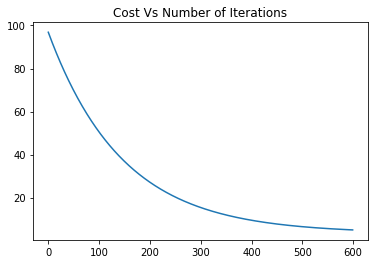

In [135]:
plot(CostTracker)
title("Cost Vs Number of Iterations")

Text(0.5,1,'Comparision of Actual Output and Function approximated by Network')

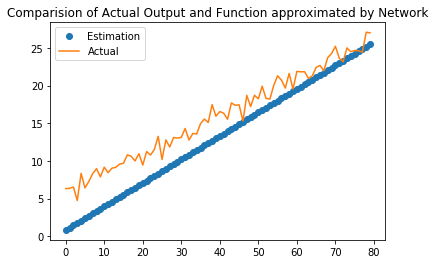

In [136]:
plot(Output_new, 'o')
plot(y)
legend(["Estimation", "Actual"])
title("Comparision of Actual Output and Function approximated by Network")

In [137]:
print("Final Cost after Training = " + str(CostTracker[NumOfIterations - 1]))

Final Cost after Training = 5.007788115211877


**Testing**

I've tested the neural network by taking samples from a different range of values ie The input values were taken in the range from $x = (0,10)$ for testing, The values of input are selected from a range of x = (5,15) at random intervals. (Contrary to uniform intervals during training.
P.S.  Note that this time, we aren't adding any gaussian noise to the output.

In [138]:
def GenerateTestData(TestSize):
    Test_inp = (15-5) * np.random.random_sample(TestSize).reshape(TestSize, 1) + 5
    Test_Out = np.zeros(TestSize).reshape(TestSize,1)
    for n in range(TestSize):
        Test_Out[n] = (2 * Test_inp[n]) + 6
    return Test_inp,Test_Out

In [139]:
Test_inp,Test_Out = GenerateTestData(TestSize)

In [140]:
Test_Output_NN_1D = NN_1D.Feedforward(Test_inp)

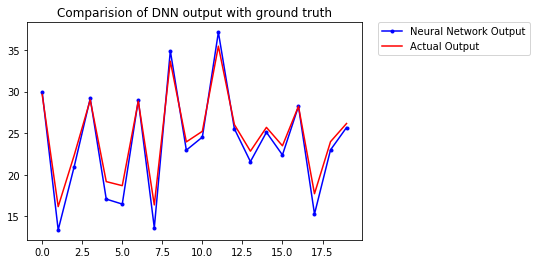

In [141]:
plt.plot(Test_Output_NN_1D[:,0], marker='.', color = "blue", label = "Neural Network Output")
plot(Test_Out, color = "Red", label = "Actual Output")
plt.title("Comparision of DNN output with ground truth")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 2D input

In [142]:
def Generate_2D_TrainingData(Size):
    x1 = np.linspace(0, 15, Size).reshape(Size, 1)
    x2 = np.linspace(0.10,0.8, Size).reshape(Size, 1)
    x = np.concatenate((x1,x2), axis=1)
    y = np.zeros(Size).reshape(Size,1)
    for n in range(Size):
        y[n] = (0.3 * x1[n]) - (2 * x2[n]) + 13 + (np.random.randn())
    plot(x1, '.')
    plot(x2, '.')
    plot(y, '.')
    legend(["X1", "X2", "Y"])
    title("Training Data")
    return x,y

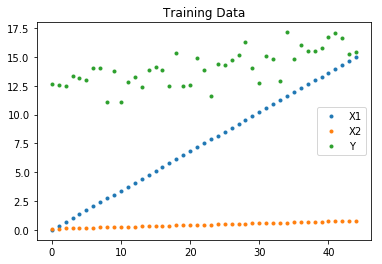

In [143]:
x,y = Generate_2D_TrainingData(45)

In [144]:
NN2 = NeuralNetwork_1D(x,y)

Text(0.5,1,'Untrained Output')

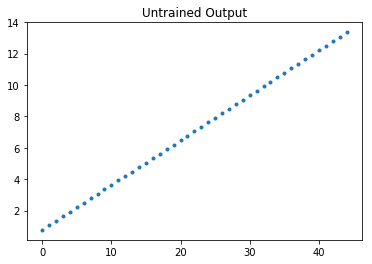

In [145]:
Output = NN2.Feedforward(x)
plot(Output, '.')
title('Untrained Output')

In [146]:
Cost_2 = NN2.cost()
print(Cost_2)

28.82107135925506


In [147]:
CostTracker2 = np.zeros(NumOfIterations)

for i in range(NumOfIterations):
    dW_2, dB_2 = NN2.CalcParameters()
    NN2.UpdateParameters(dW_2, dB_2, alpha)
    Output2_new = NN2.Feedforward(x)
    CostTracker2[i] = NN2.cost()


Text(0.5,1,'Cost vs Epoch')

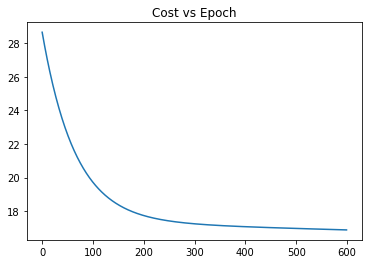

In [148]:
plot(CostTracker2)
title("Cost vs Epoch")

In [149]:
print("Final Cost = " + str(CostTracker2[NumOfIterations -1]))

Final Cost = 16.89042300843482


**Testing**

In [150]:
def Generate2DTestData(TestSize):
    Test_inp_1 = (2.5-4.5) * np.random.random_sample(TestSize).reshape(TestSize, 1) + 4.5
    Test_inp_2 = (4-3) * np.random.random_sample(TestSize).reshape(TestSize, 1) + 3
    Test_inp = np.concatenate((Test_inp_1, Test_inp_2), axis=1)
    Test_Out = np.zeros(TestSize).reshape(TestSize,1)
    for n in range(TestSize):
        Test_Out[n] = (0.3 * Test_inp_1[n]) - (2 * Test_inp_2[n]) + 13
    plot(Test_inp_1)
    plot(Test_inp_2)
    title("Input x1,x2")
    figure()
    plot(Test_Out)
    title("Test Data Output y")
    return Test_inp,Test_Out

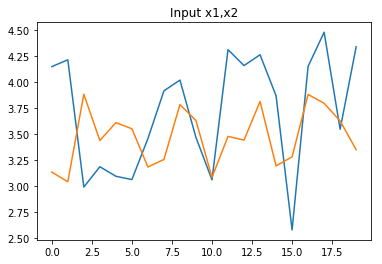

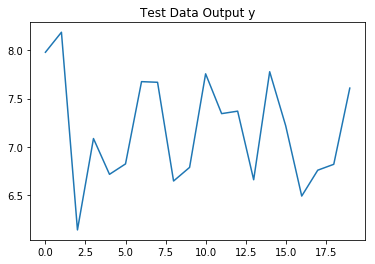

In [151]:
x, y = Generate2DTestData(TestSize)

Text(0.5,1,'Comparison of NN Output vs y')

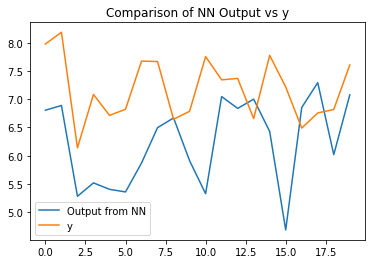

In [152]:
Output = NN2.Feedforward(x)
plot(Output)
plot(y)
legend(["Output from NN","y"])
title("Comparison of NN Output vs y")

In [153]:
Error = np.sum((y - Output)**2)/TestSize
print("Error = " + str(Error))

Error = 1.5744215567104902


#### 1.c. Finding Hyper parameters to solve the problem

The efficency with which the DNN converges higly depends on the hyper parameter like alpha (Learning Rate), Number of iterations and having appropriate sized training data.  
It was relatively easy to tweek alpha was 1D Network. I started off with a rate of 0.1 and the output barely converged. Increasing alpha did not prove to be of much help. Further, decreasing this learning rate by a factor of 10, the output got better and better. 
Further, the number of iterations didnt matter after a certain point for 1-D network.

The 2D network on the other hand is relatively harder to tune. It was not quiet intutive as to which direction the alpha needs to be tuned to converge better.